# 확률밀도의 시각화
<!-- 3-2 -- >

In [1]:
#%%
# 3-1-1 
# 색상의 조정
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors

In [3]:
x = np.linspace(-1,1, 100)
y = np.linspace(-1,1, 100)
xs, ys = np.meshgrid(x,y)
xs.shape, ys.shape
# %%
zs = np.sqrt(np.sin(xs**2) + np.cos(ys**2))

<module 'matplotlib.pyplot' from 'c:\\Users\\User\\anaconda3\\envs\\tf2\\lib\\site-packages\\matplotlib\\pyplot.py'>

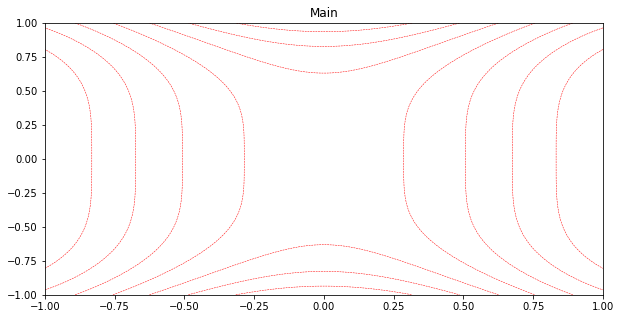

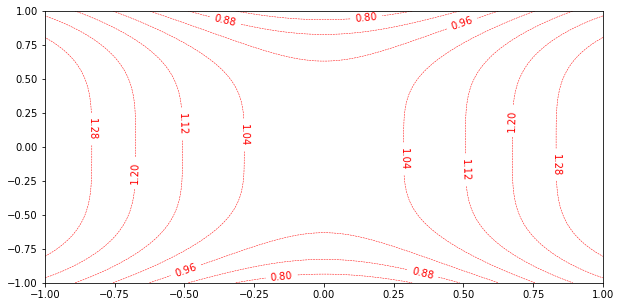

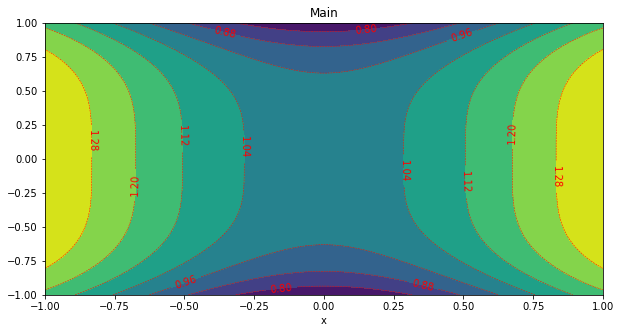

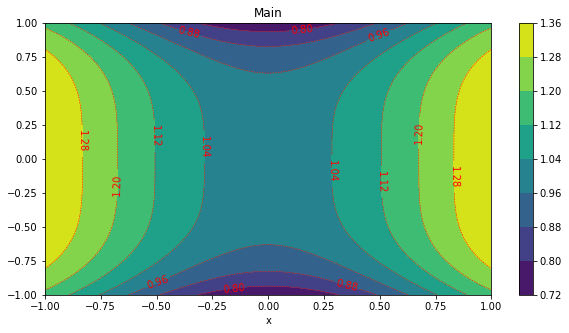

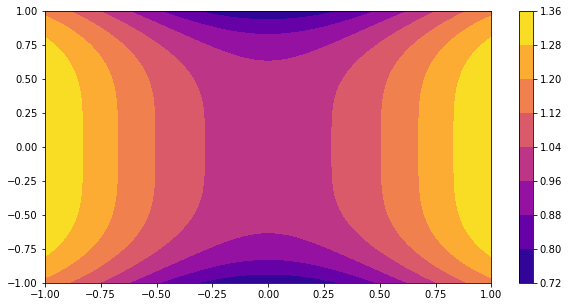

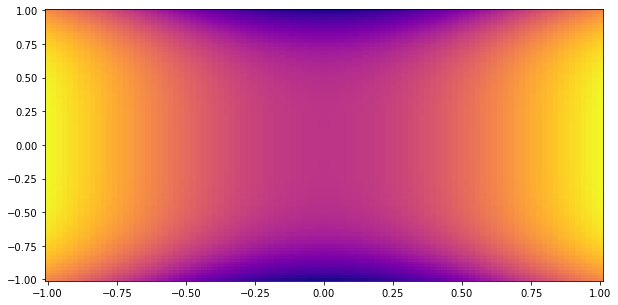

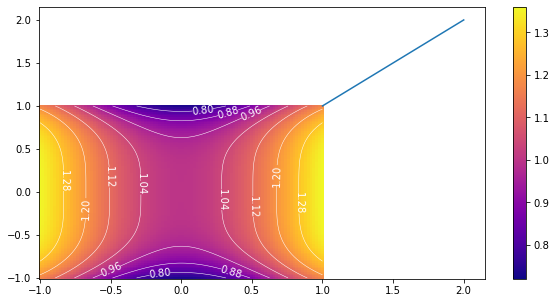

In [5]:
# %%
# 3-2-1
# colorbar의 사용용법을 확인해보면 figure에 적용하는 것임
# colorbar는 그래픽 객체를 받아야 함. (plot)
# contour 에 등고선과 눈금에 대한 값을  clable로 적용할 수 
# 왜 여기는 모든 옵션에 복수를 사용하는 것일까? (colors, linestyles)
fig, ax = plt.subplots(figsize = (10,5))
ax.contour(x,y,zs, colors ='red', linestyles = 'dashed',
                linewidths = 0.5)
ax.set_title("Main")
#%%
fig, ax = plt.subplots(figsize = (10,5))
c1 = ax.contour(x,y,zs, colors ='red', linestyles = 'dashed',
                linewidths = 0.5)
ax.clabel(c1)
#%%
fig, ax = plt.subplots(figsize = (10,5))
c1 = ax.contour(x,y,zs, colors ='red', linestyles = 'dashed',
                linewidths = 0.5)
ax.clabel(c1)
ax.contourf(x,y, zs)
ax.set_xlabel("x")
ax.set_title("Main")
#%%
fig, ax = plt.subplots(figsize = (10,5))
c1 = ax.contour(x,y,zs, colors ='red', linestyles = 'dashed',
                linewidths = 0.5)
ax.clabel(c1)
pc = ax.contourf(x,y, zs)
ax.set_xlabel("x")
ax.set_title("Main")
fig.colorbar(pc)

# %%
# colormap의 변형
# color map: 'RdBu_r', 'plasma', 'hot'
fig, ax = plt.subplots(figsize = (10,5))
pc = ax.contourf(x,y,zs, cmap = 'plasma' )
fig.colorbar(pc)
# %%
# 2-3-3
# pcolormesh: 등고선 보다는 좀 더 부드러운 이미지를 줄 수 있음
fig, ax = plt.subplots(figsize = (10,5))
c1 = ax.pcolormesh(x,y,zs, vmin = 0.72, vmax = 1.36, cmap = 'plasma')
# %%
# pcolormesh 와 contour를 같이 그리면 꽤 좋은 결과물을 얻을 수 있다. 
fig, ax = plt.subplots(figsize = (10,5))
c1 = ax.pcolormesh(x,y,zs, vmin = 0.72, vmax = 1.36, cmap = 'plasma')
fig.colorbar(c1)
c2 = ax.contour(x,y, zs, linewidths =0.5, colors = 'white')
ax.clabel(c2)
# %%
# 궁금한 것들
plt.errorbar([1,2], [1,2])
plt

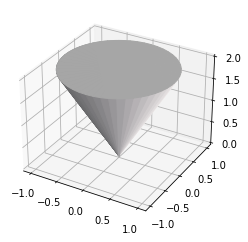

In [8]:
#%%
import numpy as np
import cv2

H = np.repeat([np.linspace(0, 179, 100)], 100, axis=0)
S = np.repeat([np.concatenate((np.linspace(0, 255, 50), np.linspace(255, 0, 50)))], 100, axis=0).transpose()
V = np.repeat([np.concatenate((np.ones(50)*255, np.linspace(255, 0, 50)))], 100, axis=0).transpose()

hsv = np.asarray(cv2.merge((H, S, V)), dtype=np.uint8)
C = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

theta = np.linspace(0, 2*np.pi, 100)
X = np.asarray([np.zeros(100), np.cos(theta), np.zeros(100)])
Y = np.asarray([np.zeros(100), np.sin(theta), np.zeros(100)])
Z = np.asarray([2*np.ones(100), 2*np.ones(100), np.zeros(100)])

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, facecolors=C/255.)

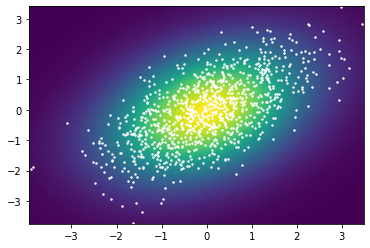

In [9]:
# 3-2-3
from sklearn.neighbors import KernelDensity

def kde2D(x, y, bandwidth, xbins=100j, ybins=100j, **kwargs): 
    """Build 2D kernel density estimate (KDE)."""

    # create grid of sample locations (default: 100x100)
    xx, yy = np.mgrid[x.min():x.max():xbins,y.min():y.max():ybins]
    xy_sample = np.concatenate([xx.reshape(-1,1),yy.reshape(-1,1)], 
                               axis = 1)
    xy_train  = np.concatenate([x.reshape(-1,1),y.reshape(-1,1)], 
                               axis = 1)

    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(xy_train)

    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde_skl.score_samples(xy_sample))
    return xx, yy, np.reshape(z, xx.shape)
#%%
import numpy as np
import matplotlib.pyplot as plt
n = 1000
m1 = np.random.normal(size=n)
m2 = np.random.normal(scale=0.5, size=n)

x, y = m1 + m2, m1 - m2
xx, yy, zz = kde2D(x, y, 1.0)
plt.pcolormesh(xx, yy, zz)
plt.scatter(x, y, s=2, facecolor='white')

#%%
xx, yy = np.mgrid[0:1:5j,0:1:5j]
xx.shape
yy.shape
# ravel" Return a contiguous flattened array.
xx.ravel()
yy.ravel()
xx.reshape(-1)
#x, y = np.meshgrid(np.linspace(0,1,5),np.linspace(0,1,5))
xy_sample = np.concatenate([x.reshape(-1,1),y.reshape(-1,1)], axis = 1)